In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


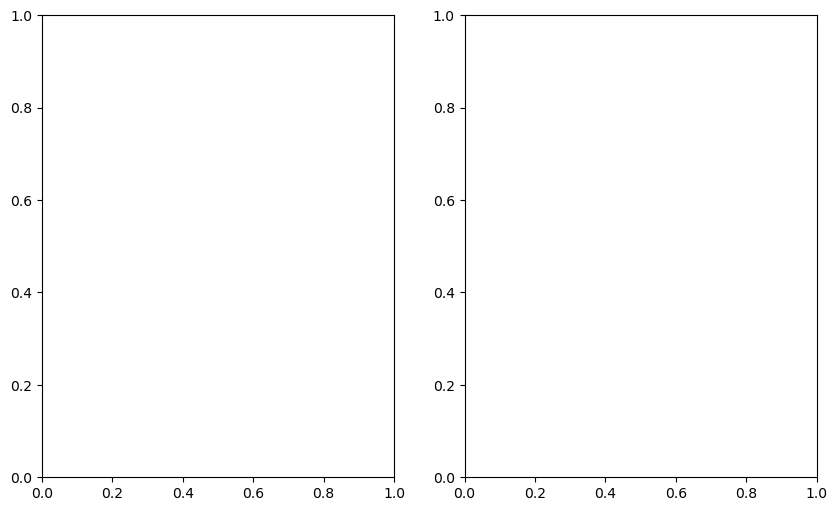

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))

<Axes: xlabel='job_title_short'>

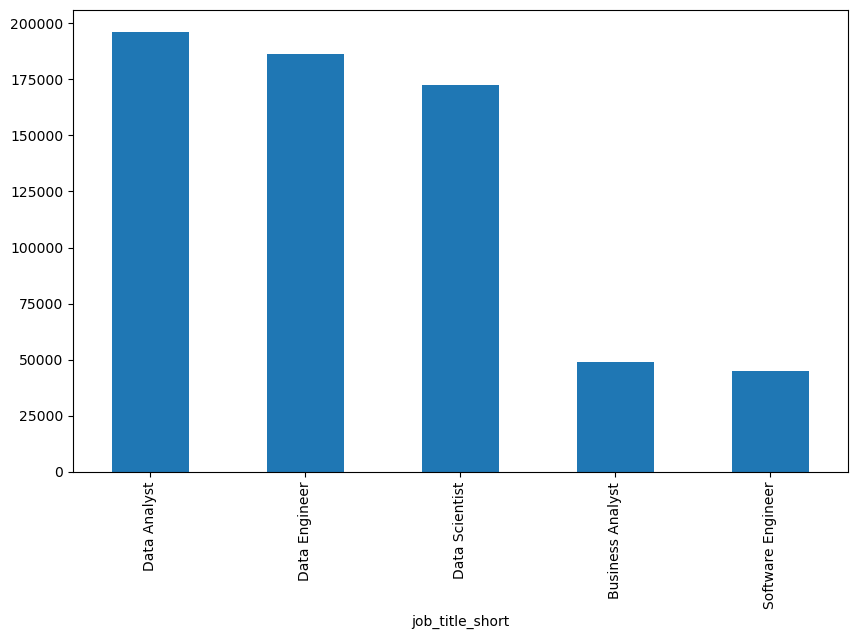

In [8]:

df['job_title_short'].value_counts().head().plot(kind='bar', figsize=(10, 6))

In [11]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

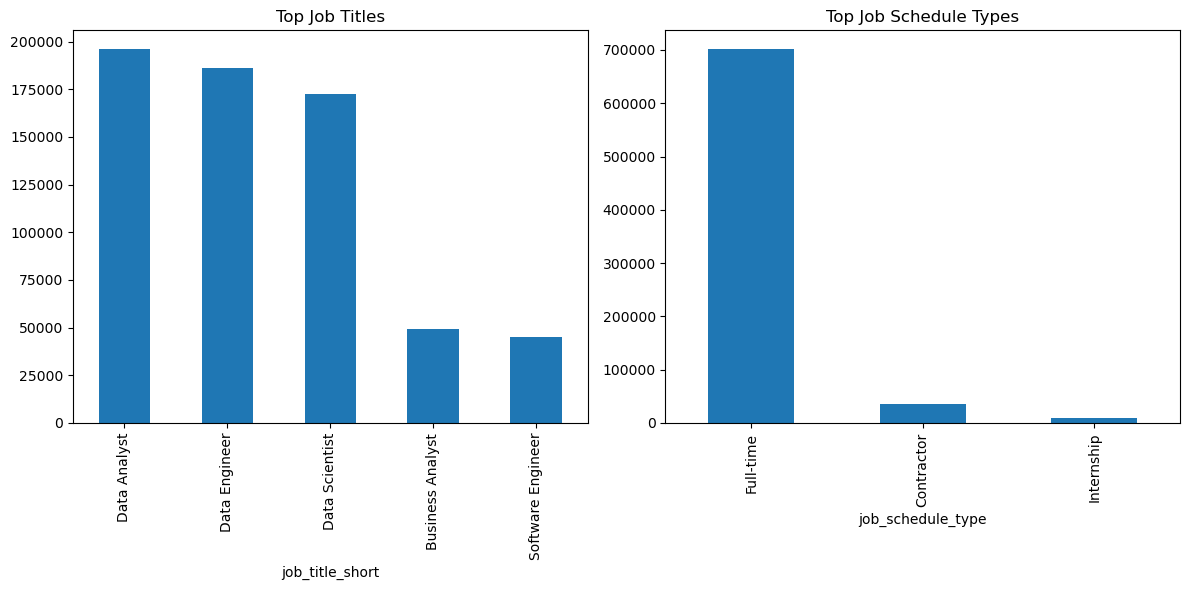

In [20]:
# import matplotlib.pyplot as plt

# Create subplots with 2 axes side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First chart
df['job_title_short'].value_counts().head().plot(
    kind='bar', ax=ax[0], title="Top Job Titles"
)

# Second chart
df['job_schedule_type'].value_counts().head(3).plot(
    kind='bar', ax=ax[1], title="Top Job Schedule Types"
)

plt.tight_layout()
plt.show()


# Heading 1   (biggest, like title)
## Heading 2  
### Heading 3  
#### Heading 4  
##### Heading 5  
###### Heading 6  (smallest heading)



In [23]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by = 'skill_count', ascending= False, inplace= True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
1723,shogun,Business Analyst,1
447,delphi,Senior Data Scientist,1
2124,visualbasic,Software Engineer,1
450,digitalocean,Business Analyst,1


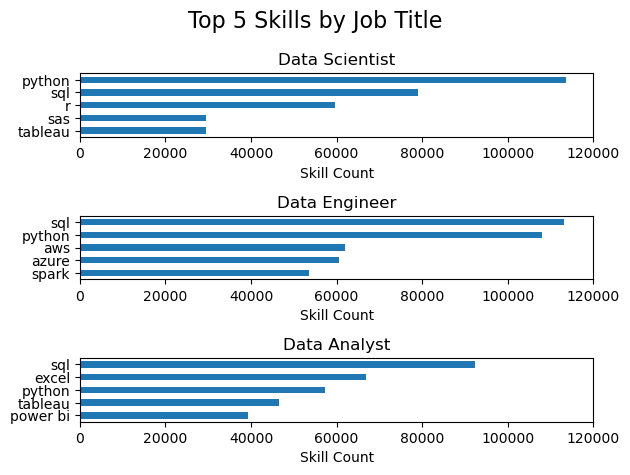

In [54]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()  # To display the highest count at the top
    ax[i].set_xlabel('Skill Count')
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 120000)
plt.suptitle('Top 5 Skills by Job Title', fontsize=16)
plt.tight_layout()

In [28]:
df_skills_count[df_skills_count['job_title_short'] == 'Data Analyst']

,job_skills,job_title_short,skill_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380
...,...,...,...
1256,nuxt.js,Data Analyst,1
771,gtx,Data Analyst,1
554,esquisse,Data Analyst,1
252,chainer,Data Analyst,1
